Solving Laplace's equation in two dimesions with Dirichlet boundary conditions at all the boundaries.

\begin{equation}
    \nabla^2V = \frac{\partial^2V}{\partial x^2} + \frac{\partial^2V}{\partial y^2} = 0
\end{equation}

With boundary conditions

\begin{align}
    V(x, 0) = 2, \,\,\, V(x, 1) = 3 \\
    V(0, y) = 0, \,\,\, V(1, y) = 1
\end{align}

Using the same differences in each dimension, $\Delta x = \Delta y$, and letting $x \rightarrow i$ and $y \rightarrow j$

\begin{equation}
    V_{i,j} = \frac{1}{4} [V_{i-1,j} + V_{i+1,j} + V_{i,j-1} + V_{i,j+1} ]
\end{equation}

[[2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.         2.         2.        ]
 [1.         1.5        1.69638348 1.78553391 1.82874084 1.846918
  1.846918   1.82874084 1.78553391 1.69638348 1.5        1.        ]
 [1.         1.30361652 1.5        1.61701134 1.68251143 1.71201317
  1.71201317 1.68251143 1.61701134 1.5        1.30361652 1.        ]
 [1.         1.21446609 1.38298866 1.5        1.57228038 1.60661008
  1.60661008 1.57228038 1.5        1.38298866 1.21446609 1.        ]
 [1.         1.17125916 1.31748857 1.42771962 1.5        1.53553669
  1.53553669 1.5        1.42771962 1.31748857 1.17125916 1.        ]
 [1.         1.153082   1.28798683 1.39338992 1.46446331 1.5
  1.5        1.46446331 1.39338992 1.28798683 1.153082   1.        ]
 [1.         1.153082   1.28798683 1.39338992 1.46446331 1.5
  1.5        1.46446331 1.39338992 1.28798683 1.153082   1.        ]
 [1.         1.17125916 1.31748857 1.42771962 1.5        1.535536

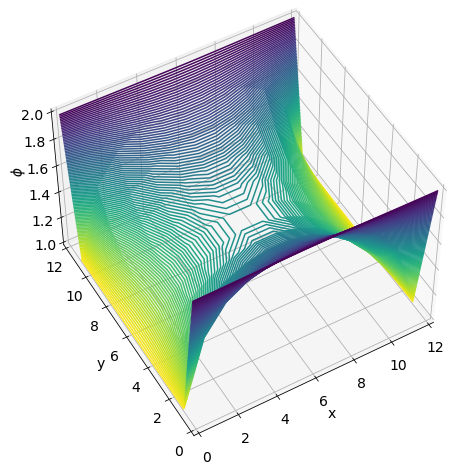

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#
# There will be N = 10 points plus the two boundary conditions in each direction
N = 10
dx = 1/(N+1)
# matrix describing the system, x columns, y rows
A = np.empty((N+2, N+2))
# boundary conditions on y
A[:,0] = 1
A[:,N+1] = 1
# boundary conditions on x
A[0,:] = 2
A[N+1,:] = 2
# filling boundary conditions and the rest with zeros
for i in range(1, N):
    for j in range(1, N):
        A[i, j] = 0.0
#
#print(A)
max_iterations = 2000
while True:
    if max_iterations == 0:
        print(A)
        break
    for i in range(1, N+1):
        for j in range(1, N+1):
            ave_ij = 0.25*(A[i-1,j] + A[i+1,j] + A[i,j-1] + A[i,j+1])
            if A[i,j] == ave_ij:
                in_a_row +=1
            else:
                in_a_row = 0
            A[i,j] = ave_ij
    if in_a_row == N**2:
        print("steady solution")
        print(A)
        break
    
    max_iterations -= 1
#
x = np.linspace(0,12,12)
y = np.linspace(0,12,12)
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size':14})
ax = plt.axes(projection='3d')
r_viridis = plt.cm.get_cmap('viridis_r')
ax.contour3D(x,y,A,100,cmap=r_viridis) # 100 contours
ax.view_init(50,-120) # direction from which to view
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel(r"$\phi$")
plt.xlim([0,12])
plt.ylim([0,12])
plt.savefig('08a_laplace.pdf',bbox_inches='tight')
plt.show()